Time Series:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#interested only in forecating of the sale quantity here:
df = pd.read_csv(r'C:\users\91842\Downloads\AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
df.set_index(pd.to_datetime(df.Date), inplace=True)

In [8]:
df.drop('Date', axis=1, inplace=True)
df.head()

,demand
Date,
2014-10-01,15
2014-10-02,7
2014-10-03,8
2014-10-04,10
2014-10-05,13


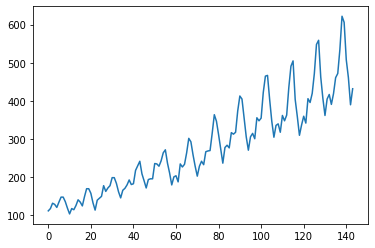

In [7]:
plt.plot(df['#Passengers']);

- So there is an uptrend present with seasonality present in the plot.
- so we can say that the data is not stationary.
- hence we need to apply transformation here to make it stationary.

### Stationarity check: 
- By using ADF test
- OR, we can also check the same thing uisng this graph: rolling mean vs the actaul values. If the rolling mean is constant then we can say that the data is stationary, if it fluctuates then data is not stationary.

In [10]:
#first take the rolling mean using any no of lags
df['#Passengers'].rolling(window=2).mean()

0        NaN
1      115.0
2      125.0
3      130.5
4      125.0
       ...  
139    614.0
140    557.0
141    484.5
142    425.5
143    411.0
Name: #Passengers, Length: 144, dtype: float64

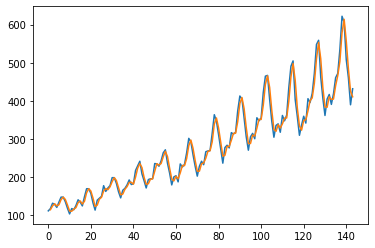

In [11]:
#now plot actual vs rolling maen:
plt.plot(df['#Passengers'])
plt.plot(df['#Passengers'].rolling(window=2).mean())

- Hence, this graph also shows that the rolling mean is not constant wrt time.
- We can conclude that this data is not stationary.
- Now that we have concluded that it is not stationary so next apply trasformation to make it stationary.

In [8]:
#plot ACF:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

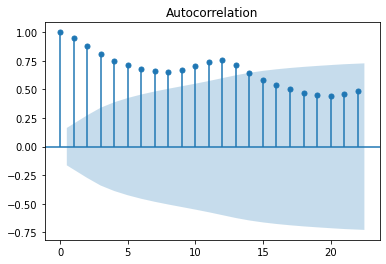

In [12]:
acf_plot = plot_acf(df['#Passengers'])

- So, we can see that are many shoot ups beyond the boundaries
- acf is wrt the previous ones
- here consecutive 

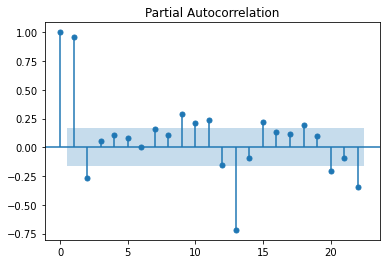

In [13]:
acf_plot = plot_pacf(df['#Passengers'])

Or, we can check for stationarity by using the ADF test too:

### ADF Test:

In [14]:
from statsmodels.tsa.stattools import adfuller

In [16]:
adfuller(df['#Passengers'], autolag=None)

(0.8939836544539318,
 0.993011306956288,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275})

- So, the p-value is far greater than 0.05, hence Accept the Null hypothesis 
(Null : The data is not stationary).
- Conclusion: so, data is not stationary.

Hence, now apply transformation: differencing of demand

In [17]:
#apply 1st differencing:
df['#Passengers_diff'] = df['#Passengers']-df['#Passengers'].shift(1)
df['#Passengers_diff']

0       NaN
1       6.0
2      14.0
3      -3.0
4      -8.0
       ... 
139   -16.0
140   -98.0
141   -47.0
142   -71.0
143    42.0
Name: #Passengers_diff, Length: 144, dtype: float64

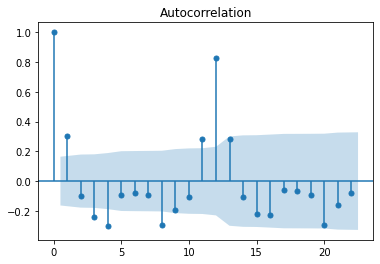

In [18]:
plot_acf(df['#Passengers_diff'].dropna());  #remove the missing value

- So, 2 consecutive shoot ups : no of lags = 7

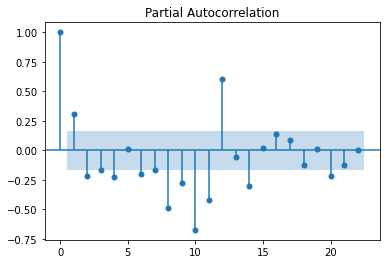

In [19]:
plot_pacf(df['#Passengers_diff'].dropna());  #remove the missing value

- there are still high correlations present (13 shoot ups)
- take the 2nd order differencing now but beyond 1 differencing is not recommended.
- so in this case first apply log transformation, then take differencing of the lo-transformed data. then plot the acf, pacf.It should work.

if we pass i = 2, means differencing two times. then the order is (1,2,1)

How to read the ACF & PACF plots?